# General notes on ML


## From: Johansson-Åkhe, Development and application of computational models for peptide-protein complexes.

### Chapter 3 -Machine Learning

Analytical and exact models can be created when a process is well understood on a detailed level.

More complex systems or less understood processes become too complex to model using first principles equations.

Heuristic methods are needed. Systems will need to be explained through approximative, statistical models fit to prior observations.
 

**Machine learning**: statistical models derived from prior observations.
- With enough prior observations (data) an appropriate model can be created even if the underlying process is not fully understood. 


- An algorithm is selected that is compatible w/ learning goals.
- Prior observations are described as features in a format suitable for the algorithm.
- Data is split into *training*, *validation*, and *test* sets.

### Input data - Features


Features = the data available to the model regarding each data point/sample/observation. 

ex. positions of atoms of a protein in 3d space

### Overfitting

If there are too many learnable parameters, the model will be specifically fitted to the training data, and **cannot generalize** to new data.
- This is one reason that ML needs lots of training data.

**Hyper-parameters** (aka non-learned parameters), ex different numbers of explanatory variables in a linear regression, or different methods to find the best fit. These can also be overfitted, i.e. specific for the training data.
- **Validation  data** is used to tune hyper-parameters.

The **test set** evaluates the final model performance.

### Unsupervised vs supervised

**Supervised**: every data point is associated w/ a label or score. The model should accurately predict labels for new data points.
- ex classification or regression

**Unsupervised**: no labels or scores, model finds patterns in data.
- ex similarity clustering, creating a more efficient representation of data w/o losing info (autoencoders). 

### Classification and regression

**Classification**: assign a label/category. 
- ex protein pair -> interacting or non-interacting.

**Regression**: predict a continuous variable or score.
- ex score the relative quality of a protein structure prediction.

### Target function / loss function: 

**J-Åkhe says:** 

What a supervised machine learning method is ultimately being trained to optimize, whether
it is a classification or regression task, is referred to as the **target function** and might need to be
rewritten in a way that direct optimization can be done in regards to it, also giving it the name
**loss function**.

In my mind, the loss function is used to measure how good the target function is. hmm..

**ChatGPT says**: 

The *target function*, also known as the *objective function* or simply the *target*, represents what your machine learning model is trying to learn or optimize. 

The *loss function*, also known as the *cost function* or *error function*, is a mathematical function that measures the error or discrepancy between the predictions made by your machine learning model and the actual target values in your training data.

The target function represents the ideal mapping you want your model to achieve. It defines the relationship between inputs and outputs, encapsulating the true underlying pattern or structure in the data.

The loss function, on the other hand, quantifies how far off your model's predictions are from the target function's values. 

In the training process, the machine learning model aims to **minimize the loss function**, it effectively seeks to **approximate the target function** as closely as possible.

This makes sense to me.

### ML development & history

#### **Linear regression (1805)**

A weight ($\beta$) is assigned to each feature ($x$) to linearly fit to a score: 

$y=\beta_0+\beta_1x_1+\beta_2x_2+...+\beta_ix_i$

Least-squares estimation can be used to find the **optimal weights** through training data. 
- most often a least-squares sum fit minimizing the formula:

$L=\|\tilde{X} \vec{\beta}-\vec{y}\|_2^2$

Where:
- L = the least squares loss, a measure of the **error between the predicted values and the actual target values**. The goal in linear regression is to minimize this loss function.
- $\tilde{X} \vec{\beta}$ = the predicted values generated by the linear model
- $\tilde{X}$ = matrix containing the predictor variables. Each row of this matrix represents an individual data point, and each column represents a different feature or predictor variable. The matrix is often augmented with an additional column of ones, known as the *bias term or intercept*, to account for the constant term in the linear model.
- $\vec{\beta}$ = vector of coefficients (parameters) that the model is trying to estimate. Each element of $\vec{\beta}$ corresponds to the weight of a predictor variable. The linear model calculates the predicted values by taking the **dot product** of $\tilde{X} \vec{\beta}$​.
- $\vec{y}$ = vector containing the actual target values, also known as the observed or true values.
- $\|\|_2^2$ represents the L2 (Euclidean) norm of a vector, squared. In this context, it is used to measure the squared distance between the predicted values $\tilde{X} \vec{\beta}$ and the actual target values $\vec{y}$. Squaring the L2 norm is a common step in the least squares method, which simplifies the calculation and makes the loss function differentiable, allowing for optimization.

**Lets have an example.**



$L=\|\tilde{X} \vec{\beta}-\vec{y}\|_2^2$

Imagine you have a simple dataset with one predictor variable and a target variable, and you want to fit a linear model to predict the target variable based on the predictor.

Suppose you have the following data:

\begin{array}{|c|c|}
\hline
\text{Predictor (X)} & \text{Target (y)} \\
\hline
1 & 2 \\
2 & 3 \\
3 & 5 \\
4 & 4 \\
\hline
\end{array}

The linear model you're trying to fit is given by:

$ y = \beta_0 + \beta_1 \cdot X $

Here, $\beta_0$ and $\beta_1$ are the coefficients of the model that you need to estimate.


Now, let's set up the matrix $\tilde{X}$, the vector $\vec{\beta}$, and the vector $\vec{y}$ based on our data:

$\tilde{X}$ is the matrix of predictor variables:

$ \tilde{X} =
\begin{bmatrix}
1 & 1 \\
1 & 2 \\
1 & 3 \\
1 & 4 \\
\end{bmatrix}
$

The matrix is augmented with an additional column of ones, known as the *bias term or intercept*, to account for the constant term in the linear model.

$\vec{\beta}$ is the vector of coefficients (which we want to estimate):

$ \vec{\beta} = 
\begin{bmatrix}
\beta_0 \\
\beta_1 \\
\end{bmatrix}
$

$\vec{y}$ is the vector of actual target values:

$\vec{y} = 
\begin{bmatrix}
2 \\
3 \\
5 \\
4 \\
\end{bmatrix}
$

Using the linear model, you can calculate the predicted values $\tilde{X} \vec{\beta}$ for each data point:

$
\tilde{X} \vec{\beta} =
\begin{bmatrix}
1 & 1 \\
1 & 2 \\
1 & 3 \\
1 & 4 \\
\end{bmatrix}
\begin{bmatrix}
\beta_0 \\
\beta_1 \\
\end{bmatrix} =
\begin{bmatrix}
\beta_0 + \beta_1 \\
\beta_0 + 2\beta_1 \\
\beta_0 + 3\beta_1 \\
\beta_0 + 4\beta_1 \\
\end{bmatrix}
$

The **matrix multiplication** $\tilde{X}\vec{\beta}$ works like this:

Take the first row of $\tilde{X}$ (representing the first data point) and perform the dot product with $\vec{\beta}$. This results in the first predicted value.
- For the first row of $\tilde{X}$:
- 1 (from the first column) * $\beta_0$​ (from $\vec{\beta}$​) + 1 (from the second column) * $\beta_1$​ (from $\vec{\beta}$​)
- This gives you the predicted value for the first data point: $\beta_0+\beta_1$.

Repeat this process for each row of $\tilde{X}$, calculating the predicted values for all data points.
- For the second row of $\tilde{X}$:
- 1 (from the first column) * $\beta_0$​ (from $\vec{\beta}$​) + 2 (from the second column) * $\beta_1$​ (from $\vec{\beta}$​)
- This gives you the predicted value for the first data point: $\beta_0+2\beta_1$.

And so it goes.

The least squares loss, $L$, is calculated as the squared $L_2$ (Euclidean) norm of the difference between the predicted values and the actual target values:

$L = \|\tilde{X} \vec{\beta} - \vec{y}\|_2^2 = \sum_{i=1}^4 (\beta_0 + i\beta_1 - y_i)^2$


For a specific set of $\beta_0$ and $\beta_1$, you can compute $L$ and see how well the model fits the data. The goal is to find the values of $\beta_0$ and $\beta_1$ that minimize this loss function, as they represent the best-fitting line through the data points.

To find the optimal values of $\beta_0$ and $\beta_1$, you can use various optimization techniques, such as **gradient descent** or **analytical solutions**. The values of $\beta_0$ and $\beta_1$ that minimize $L$ will give you the best linear model for your data.


#### Gradient descent

Objective: We want to optimize the coefficients (β0 and β1​) in a simple linear regression model using Gradient Descent. We'll use the **MSE loss function**, which is defined as:

$L(\beta_0, \beta_1) = \frac{1}{n} \sum_{i=1}^{n} (y_i - (\beta_0 + \beta_1 x_i))^2$


Here, we have $\frac{1}{n}$ because we want the **mean** squared error. Whereas in the previous formula we only did the summed square error.

The expression in the parenthesis is just a different way of expressing what was in the parenthesis in the previous formula. The final answers will be the same.

**Initial wieghts**, for example:

$\beta_0^{(0)} = 0, \quad \beta_1^{(0)} = 1$


**Calculate the Loss**: Compute the loss using the MSE formula with the initial weights.

$L(\beta_0, \beta_1)^{(0)} = \frac{1}{n} \sum_{i=1}^{n} (y_i - (\beta_0^{(0)} + \beta_1^{(0)} x_i))²
$

Compute the **partial derivatives** of the loss function with respect to each coefficient:

$\frac{\partial L}{\partial \beta_0} = -\frac{2}{n} \sum_{i=1}^{n} (y_i - (\beta_0^{(0)} + \beta_1^{(0)} x_i))
$

$\frac{\partial L}{\partial \beta_1} = -\frac{2}{n} \sum_{i=1}^{n} x_i(y_i - (\beta_0^{(0)} + \beta_1^{(0)} x_i))
$

The gradient is computed by taking the **partial derivatives** of the loss function with respect to each weight. In the case of linear regression, the loss function is typically the Mean Squared Error (MSE), which measures the error between the predicted values and the actual target values. Partial derivatives allow you to isolate the effect of a single variable on the loss function. By taking the **derivative with respect to one variable** while treating the others as constants, you can understand how small changes in that variable influence the loss.

**Heres the calculus**:

We use the **chain rule**.

The chain rule is a fundamental rule in calculus that allows you to find the derivative of a **composition of functions**.


The chain rule:

$\frac{d}{dx}f(g(x))=f'(g(x))g'(x)$



**Example**

$\frac{1}{x²-4}$ is the composite $f(g(x))$ of $f(u)=\frac{1}{u}$ and $g(x)=x²-4$. So $u=g(x)$.

Their derivatives:

$f'(u)=f'(g(x))=\frac{-1}{u²}$

$g'(x)=2x$

Chain rule:

$\frac{d}{dx}f(g(x))=f'(g(x))g'(x)=\frac{-1}{u²}2x=\frac{-2x}{u²}=\frac{-2x}{(x²-4)²}$

With **Leibniz notation**, chain rule:

$\frac{dy}{dx}=\frac{dy}{du}\frac{du}{dx}$

$y=f(u)=f(g(x))$

$\frac{dy}{dx}=\frac{dy}{du}\frac{du}{dx}=\frac{d}{dx}(f(g(x))=\frac{d}{du}f(u)\frac{d}{dx}g(x)=f'(g(x))g'(x)$

**Back to the task at hand**. Will have to read up on calculus later.

The derivatives weve calculated​, provide information on how the loss function changes with respect to changes in the model parameters.

Collectively, these derivatives represent the **gradient** of the loss function, which is a **vector** containing the partial derivatives with respect to each parameter. In this case, it's a 2D gradient vector: 

$\nabla L = (\frac{dL}{d\beta_o},\frac{dL}{d\beta_1})$


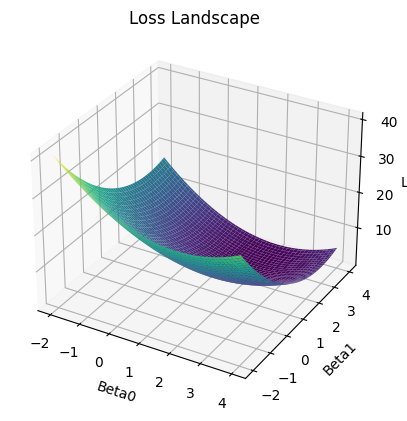

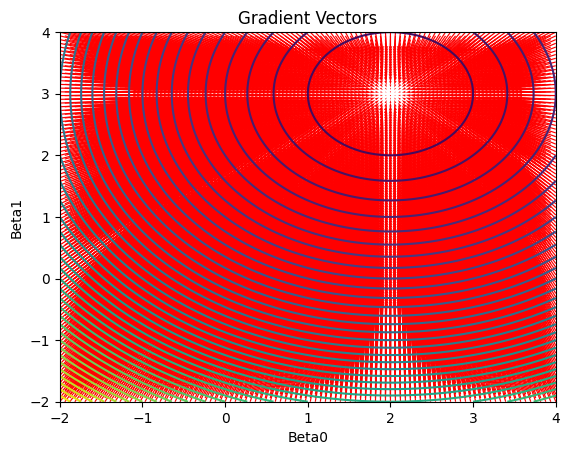

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the loss function (squared Euclidean distance)
def loss_function(beta0, beta1):
    return (beta0 - 2)**2 + (beta1 - 3)**2

# Create a grid of beta0 and beta1 values
beta0 = np.linspace(-2, 4, 100)
beta1 = np.linspace(-2, 4, 100)
beta0, beta1 = np.meshgrid(beta0, beta1)
loss = loss_function(beta0, beta1)

# Calculate gradient vectors
grad_beta0 = 2 * (beta0 - 2)
grad_beta1 = 2 * (beta1 - 3)

# Create the loss landscape plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(beta0, beta1, loss, cmap='viridis')
ax.set_xlabel('Beta0')
ax.set_ylabel('Beta1')
ax.set_zlabel('Loss')
ax.set_title('Loss Landscape')

# Create gradient vectors plot
plt.figure()
plt.contour(beta0, beta1, loss, levels=50, cmap='viridis')
plt.quiver(beta0, beta1, -grad_beta0, -grad_beta1, scale=50, color='red')
plt.xlabel('Beta0')
plt.ylabel('Beta1')
plt.title('Gradient Vectors')

plt.show()


The gradient descent algorithm works by iteratively updating the parameters in the direction that reduces the loss. 

Choose hyperparameters for the optimization process:
- Learning Rate (α): This controls the step size in each update. You need to choose a small positive value, such as α=0.01.
- Number of Iterations (N): Decide how many iterations of updates you want to perform. This can vary depending on the convergence criteria and the complexity of your problem.

This will take some doing. Back to it later.

##### Co-linearity / multicolinearity

With co-linearity between variables, most methods of solving a least-squares fit can become unstable. 
- Regularization methods are ways of solving this: ridge regression or LASSO.

Co-linearity, more commonly known as **multicollinearity**, occurs when two or more predictor variables in a linear regression model are highly correlated. In other words, one variable can be predicted fairly well from the others. Multicollinearity is a problem because it can make it difficult to disentangle the individual effects of each predictor variable on the target variable.

**Ridge regression** adds a penalty term to the least squares loss function, which is a squared sum of the L2-norm (Euclidean norm) of all the weights (coefficients). This penalty encourages the model to find a unique solution with minimized weights. The L2 penalty helps prevent extreme values of coefficients and reduces multicollinearity-induced instability. It's especially useful when all features are potentially relevant.

**LASSO** is another regularization method that adds a penalty term to the loss function, but it uses the L1-norm (sum of absolute values) of the weights. The L1 penalty has a unique property in that it can force some weights to approach zero, effectively making some features irrelevant. This helps eliminate redundant features, simplifying the model and addressing multicollinearity-induced instability. LASSO is particularly useful when you suspect that some features are less relevant or want feature selection.



This makes no sense at all. 

**Lets have some examples**

Consider a dataset with two highly correlated predictor variables, "X1" and "X2," and a target variable, "Y."

|   X1  |   X2  |   Y   |
|-------|-------|-------|
|  2.1  |  4.0  |  12.4 |
|  3.2  |  6.2  |  18.8 |
|  4.3  |  8.3  |  25.4 |
|  3.4  |  6.5  |  19.3 |
|  2.5  |  4.1  |  13.5 |
|  4.6  |  8.4  |  26.2 |
|  3.7  |  6.7  |  20.1 |
|  2.8  |  4.3  |  14.1 |
|  4.9  |  8.6  |  26.9 |
|  3.0  |  6.0  |  18.0 |


These variables have a strong positive correlation, as X2 is approximately twice the value of X1.
We can see that X1 and X2 are correlated:


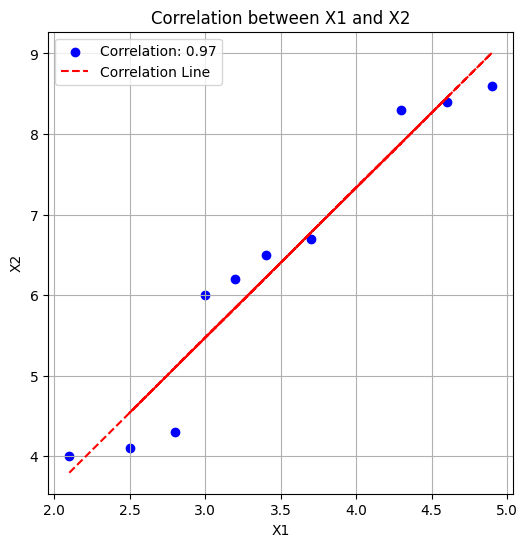

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Predictor Variables
X1 = [2.1, 3.2, 4.3, 3.4, 2.5, 4.6, 3.7, 2.8, 4.9, 3.0]
X2 = [4.0, 6.2, 8.3, 6.5, 4.1, 8.4, 6.7, 4.3, 8.6, 6.0]



# Calculate the correlation coefficient
correlation = np.corrcoef(X1, X2)[0, 1]

# Create a scatter plot with a correlation line
plt.figure(figsize=(6, 6))
plt.scatter(X1, X2, c='b', label=f'Correlation: {correlation:.2f}')
plt.plot(X1, np.poly1d(np.polyfit(X1, X2, 1))(X1), color='r', linestyle='--', label='Correlation Line')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Correlation between X1 and X2')
plt.legend()
plt.grid(True)
plt.show()


**PROBLEMS**

**Coefficient Interpretation**: In a linear regression model, the coefficients (slopes) represent the change in the target variable for a one-unit change in the predictor variable while keeping other variables constant. In the presence of multicollinearity, it becomes challenging to interpret the coefficients. For instance, if you increase X1 while holding X2 constant, the effect on Y may not be clear due to the influence of X2. 
- If you were to increase the value of X1 (e.g., by one unit) while keeping X2 constant, you'd expect this change in X1 to lead to a certain change in Y, as indicated by the coefficient of X1 in the regression model.
- However, due to the high correlation between X1 and X2, changes in X1 are often accompanied by corresponding changes in X2. In other words, it's challenging to truly "hold X2 constant" when you change X1 because they are strongly related.

it's a problem related to the nature of the data and the underlying processes being modeled. 

**Coefficient Instability**: Multicollinearity can lead to instability in coefficient estimates. Small changes in the data can result in significantly different coefficient estimates. The coefficients may not be stable and can vary based on the specific data points used.
- Multicollinearity arises from the high correlation between predictor variables. As a result, the model may have difficulty distinguishing the unique influence of each correlated variable on the target variable.
- the specific data points used for modeling can significantly impact the coefficient estimates.
- When the data changes slightly, the model may respond by assigning the influence to one variable in one instance and another variable in a slightly different instance. This inconsistency in estimates is what we mean by "instability."


Multicollinearity leads to **inflated standard errors** for the coefficient estimates. Larger standard errors make it difficult to determine whether a coefficient is statistically significant or not.

#### Ridge regression

Can mitigate the problem of colinearity

Ridge Regression is a regularization technique used to address multicollinearity in linear regression. It adds a *penalty term* to the linear regression objective function to control the size of the coefficients. The formula for Ridge Regression is:

$ L_{\text{Ridge}} = \sum_{i=1}^{10} (\beta_0 + i\beta_1 + i\beta_2 - y_i)^2 + \lambda (\beta_1^2 + \beta_2^2) $




Compared to the regular loss function:


$
L = \|\tilde{X} \vec{\beta} - \vec{y}\|_2^2 + \sum_{i=1}^{10} (\beta_0 + i\beta_1 + i\beta_2 - y_i)^2
$



The second part of the ridge function is the penalty term. 
- Lambda ($\lambda$) is a hyperparameter in Ridge Regression that controls the strength of regularization. It is a non-negative constant that you can adjust.
- The choice of $\lambda$ determines the balance between fitting the data (minimizing the sum of squared errors) and keeping the coefficients stable. A larger $\lambda$ introduces stronger regularization, which leads to smaller and more stable coefficients.
- By adjusting $\lambda$, you can control the extent to which Ridge Regression penalizes large coefficient values. A higher $\lambda$ increases the penalty, while a lower $\lambda$ reduces it.
- the betas are the weights squared

This is how it works:

X1: [1.09762701 1.43037873 1.20552675 1.08976637 0.8473096 ]
X2: [2.76545079 3.29935898 3.39942734 2.28157754 1.90349595]
y with random noise: [11.16942291 13.02884238 13.34452955  9.98645391  7.6538602 ]
coefficients for aplha 0 : [1.81102054 3.06667548]
coefficients for aplha 0.1 : [1.78015377 3.07633156]
coefficients for aplha 1 : [1.64477285 3.09499275]
coefficients for aplha 10 : [1.38294288 2.80825882]


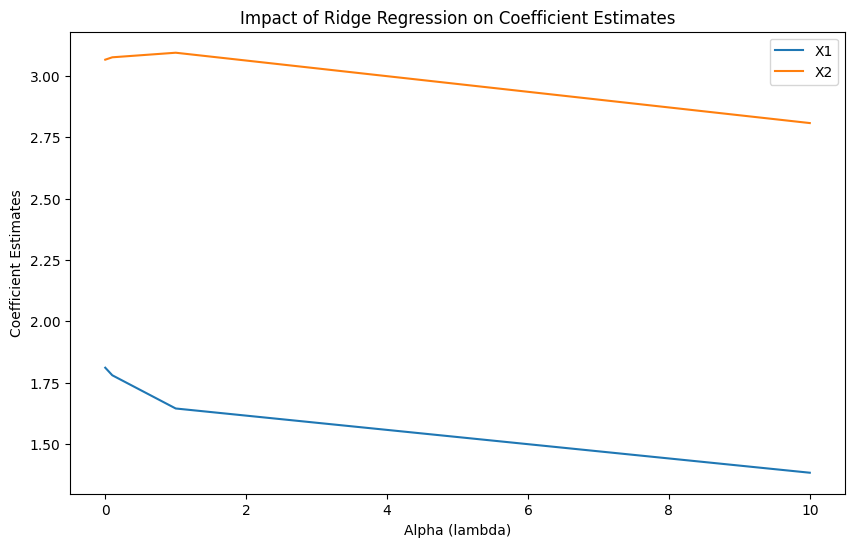

In [3]:
import numpy as np
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

# Generate synthetic data with multicollinearity
np.random.seed(0)
n_samples = 50
X1 = np.random.rand(n_samples) * 2
print('X1:',X1[:5])
X2 = 2 * X1 + np.random.rand(n_samples)
print('X2:',X2[:5])
y = 2 * X1 + 3 * X2 + np.random.rand(n_samples)  # True coefficients: [2, 3]
# some random noise is added to the y variable
print('y with random noise:',y[:5])

# Perform Ridge Regression with various alpha (lambda) values
alphas = [0, 0.1, 1, 10]
coefficients = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(np.column_stack((X1, X2)), y)
    coefficients.append(ridge.coef_)
    print('coefficients for aplha', alpha, ':',ridge.coef_)
# Plot the coefficient estimates for X1 and X2
plt.figure(figsize=(10, 6))
plt.plot(alphas, coefficients)
plt.xlabel("Alpha (lambda)")
plt.ylabel("Coefficient Estimates")
plt.legend(["X1", "X2"])
plt.title("Impact of Ridge Regression on Coefficient Estimates")
plt.show()


True coefficients are [2 X1, 3 X2]

The Ridge Regression coefficients may not exactly match the true coefficients because Ridge Regression introduces a trade-off between fitting the data well and stabilizing the coefficients. The regularization term penalizes large coefficient values, which helps mitigate multicollinearity and stabilize the estimates but may lead to some bias in the coefficients.

In practice, the choice of the optimal alpha value and interpretation of coefficient estimates consider this trade-off. The goal is to strike a balance between bias and variance in the model while achieving good predictive performance.

Lets optimize the alpha:

Optimal alpha (lambda): 0.1
Coefficients: [1.78015377 3.07633156]


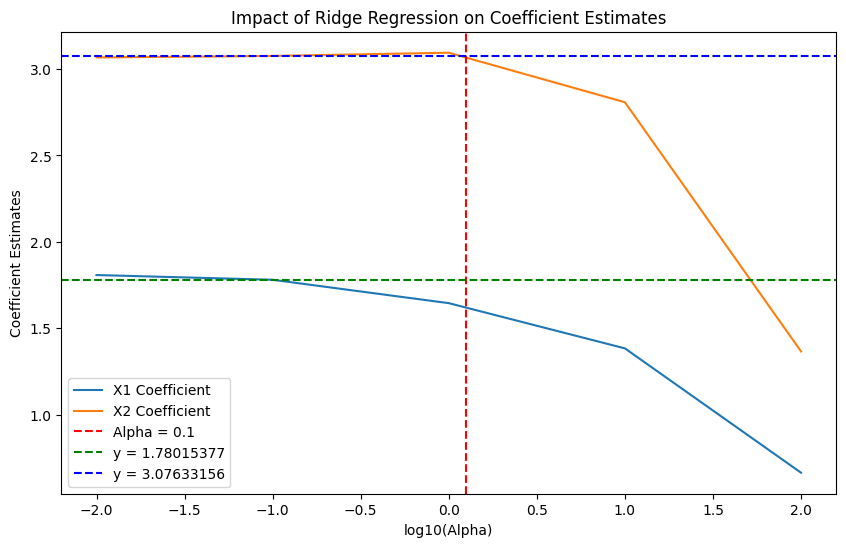

In [30]:
import numpy as np
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import cross_val_score

# Generate synthetic data with multicollinearity
np.random.seed(0)
n_samples = 50
X1 = np.random.rand(n_samples) * 2
X2 = 2 * X1 + np.random.rand(n_samples)
y = 2 * X1 + 3 * X2 + np.random.rand(n_samples)  # True coefficients: [2, 3]
# adding some noise again

# Create RidgeCV model with a range of alpha values (CV as in cross validation)
# The RidgeCV model internally performs cross-validation to identify the optimal alpha.
alphas = [0.01, 0.1, 1, 10, 100]
ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)

# Fit the RidgeCV model and perform cross-validation
ridge_cv.fit(np.column_stack((X1, X2)), y)

# Get the optimal alpha and coefficients
optimal_alpha = ridge_cv.alpha_
coefficients = ridge_cv.coef_

print("Optimal alpha (lambda):", optimal_alpha)
print("Coefficients:", coefficients)

# Create lists to store coefficient values for all alphas
coef_X1 = []
coef_X2 = []

# Fit Ridge models for each alpha and store coefficients
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(np.column_stack((X1, X2)), y)
    coef_X1.append(ridge.coef_[0])
    coef_X2.append(ridge.coef_[1])

# Plot the coefficient estimates for X1 and X2
plt.figure(figsize=(10, 6))
plt.plot(np.log10(alphas), coef_X1, label="X1 Coefficient")
plt.plot(np.log10(alphas), coef_X2, label="X2 Coefficient")
plt.xlabel("log10(Alpha)")
plt.ylabel("Coefficient Estimates")
plt.title("Impact of Ridge Regression on Coefficient Estimates")
plt.axvline(0.1, color='r', linestyle='--', label="Alpha = 0.1")
plt.axhline(1.78015377, color='g', linestyle='--', label="y = 1.78015377")
plt.axhline(3.07633156, color='b', linestyle='--', label="y = 3.07633156")
#plt.yticks(np.arange(1.0, 3.2, 0.1))
plt.legend()
plt.show()

The intercepts are not precise since different models were used to get the optimal coeffs and to create the curves. oh well, you ge the idea

#### LASSO -same thing

$L_{\text{Lasso}} = \|\tilde{X} \vec{\beta} - \vec{y}\|_2^2 + \alpha \|\vec{\beta}\|_1 = \sum_{i=1}^{10} (\beta_0 + i\beta_1 + i\beta_2 - y_i)^2 + \alpha \sum_{j=1}^{3} |\beta_j|$


- j: An index for the coefficients (from 1 to 3).
- α: The regularization parameter, controlling the strength of L1 regularization.
- ∣βj​∣: The absolute value of the j-th coefficient.

This is X:
 [[0.5488135  0.71518937]
 [0.60276338 0.54488318]
 [0.4236548  0.64589411]
 [0.43758721 0.891773  ]
 [0.96366276 0.38344152]]
This is y:
 [3.64013721 2.35809074 1.9890183  2.87739761 3.40885509]
Optimal Alpha: 0.0010
Optimal Coefficients: [2.77332379 2.00161611]


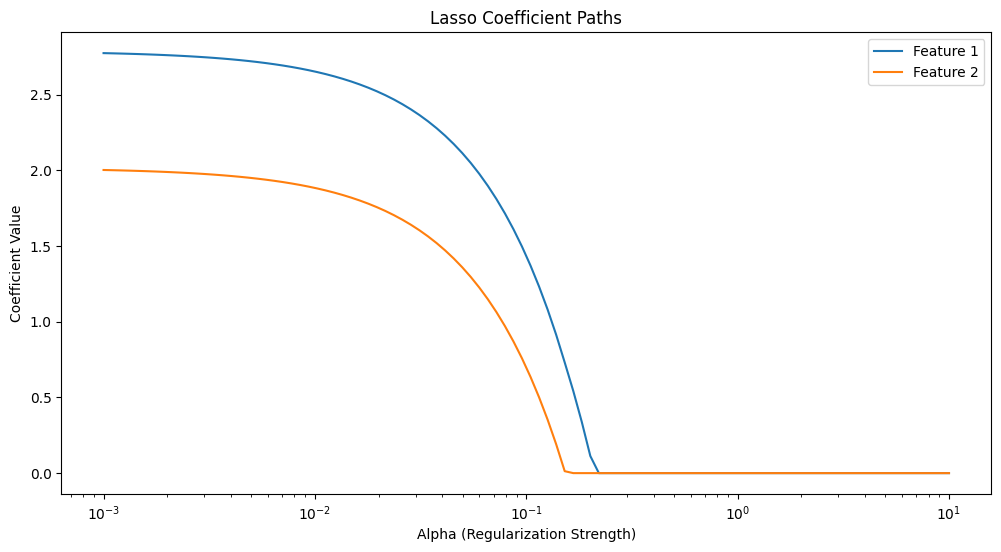

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Generate correlated data
np.random.seed(0)
n_samples = 100
X = np.random.rand(n_samples, 2)
print('This is X:\n',X[:5])
true_coefficients = np.array([3, 2])
y = X.dot(true_coefficients) + np.random.normal(0, 0.5, n_samples)
print('This is y:\n',y[:5])

# Create a range of alpha values for Lasso
alphas = np.logspace(-3, 1, 100)

# Initialize lists to store coefficient values and MSE (mean square error) for each alpha
coefficients = []
mse_values = []

# Fit Lasso regression models for each alpha
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X, y)
    coefficients.append(lasso.coef_)
    y_pred = lasso.predict(X)
    mse = mean_squared_error(y, y_pred)
    mse_values.append(mse)

# Find the alpha that minimizes MSE
optimal_alpha = alphas[np.argmin(mse_values)]
optimal_coefficients = coefficients[np.argmin(mse_values)]

# Plot coefficient paths for Lasso
plt.figure(figsize=(12, 6))
for feature in range(2):
    plt.plot(alphas, [coef[feature] for coef in coefficients], label=f'Feature {feature + 1}')

plt.xscale('log')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Coefficient Value')
plt.title('Lasso Coefficient Paths')
plt.legend()
plt.axis('tight')

# Print the optimal alpha and coefficients
print(f'Optimal Alpha: {optimal_alpha:.4f}')
print('Optimal Coefficients:', optimal_coefficients)
plt.show()


Lasso and Ridge regression are regularization techniques used to improve the performance of linear regression models. They are valuable for various reasons:
- **Preventing Overfitting**: Lasso and Ridge regression add regularization terms to the linear regression loss function. This helps prevent overfitting, where the model fits the training data too closely, capturing noise and leading to poor generalization to new data.
- **Feature Selection**: Lasso encourages sparsity in the model by driving some coefficients to exactly zero. This means it can perform automatic feature selection, which is beneficial when dealing with datasets with many features or when you suspect that some features are irrelevant. 
- Dealing with **Multicollinearity**: Ridge regression is particularly useful when multicollinearity exists, where two or more predictor variables are highly correlated. Ridge mitigates multicollinearity by distributing the impact across correlated variables, which helps stabilize and improve coefficient estimates.
- **Balancing Bias and Variance**: By controlling the regularization strength through the hyperparameter (αα in Lasso and Ridge), you can strike a balance between fitting the data well (reducing bias) and keeping the model simple (reducing variance). Regularization allows you to fine-tune this trade-off.
- **Model Stability**: Regularization techniques improve model stability by reducing the sensitivity of the model to minor changes in the data. This can make the model more robust and reliable.

Here's when they are typically used:

**Lasso Regression** (L1 Regularization):
- When you have many features, and you want to automatically select the most important ones.
- When you suspect that some features are irrelevant or redundant and want to eliminate them.
- When you want a more interpretable model with a subset of significant predictors.
- In situations where you want to reduce overfitting by encouraging sparsity in the model.

**Ridge Regression** (L2 Regularization):
- When you have multicollinearity (high correlation between predictor variables) in your dataset.
- To improve the stability of the model when you have a high-dimensional feature space.
- When you want to balance the trade-off between bias and variance while preventing overfitting.
- In situations where you don't want to eliminate any features but rather shrink the coefficients smoothly.

The choice between Lasso and Ridge, or a combination of both (**Elastic Net**), depends on the specific characteristics of your data and the trade-offs you want to make. Cross-validation is often used to determine the optimal regularization strength for a given problem.

#### Elastic net

$L_{\text{Elastic Net}} = \|\tilde{X} \vec{\beta} - \vec{y}\|_2^2 + \alpha \left(\rho \|\vec{\beta}\|_1 + \frac{1}{2}(1-\rho) \|\vec{\beta}\|_2^2\right)$


- L​ is the total loss function for Elastic Net regression.
- X represents the feature matrix, where each row is a data point, and each column is a feature.
- beta​ is the coefficient vector containing the coefficients for each feature.
- y​ is the vector of target values.
- alhpa is the regularization parameter, controlling the strength of the regularization. It's similar to the α used in Lasso and Ridge, but in Elastic Net, it determines the overall strength of regularization.
- ρ is the mixing parameter that balances the contributions of L1 and L2 regularization. When ρ=1, Elastic Net is equivalent to Lasso, and when ρ=0 it's equivalent to Ridge. Values between 0 and 1 allow you to balance the trade-off between L1 and L2 regularization.

#### **Logistic regression (1944)**

In a classification task, linear regression is ill suited, as we would like to constrain the prediction
to between 0 and 1 for each class. In this case, logistic regression can be used instead, which
attempts to predict the probability of classes being 1:

$P(y=1)=\frac{1}{1+e^{-(\beta_0+\beta_1 x_1+\beta_2 x_2+...+\beta_i x_i)}}$

In many classification problems, the goal is to determine the probability that a particular data point belongs to a specific class.

linear regression's output can be any real number, which doesn't naturally fit the requirements of classifying data into distinct categories.

On the other hand, logistic regression is a statistical model used for classification. It's designed to predict the probability of an instance belonging to a particular class (usually binary classification, where there are two classes: 0 and 1). 

The logistic function (also known as the sigmoid function) on the right side of the equation transforms the linear combination of input features and coefficients into a probability between 0 and 1.

If the predicted probability is greater than a chosen threshold (usually 0.5), the instance is assigned to that class.

To optimize the weights (coefficients) in a logistic regression model, you typically use a method called "maximum likelihood estimation" or "gradient descent."



**Initialization**: Start by initializing the coefficients, often with small random values.

**Calculate Predictions**: Use the logistic regression model's hypothesis to make predictions for each data point based on the current values of the coefficients.

**Compute the Loss Function**: Define a loss function (often the log-likelihood or a related function) that measures how well the model's predictions match the actual labels in the training data. The loss function quantifies the error between predicted probabilities and the true class labels.

**Gradient Descent**: Use a gradient-based optimization algorithm, such as gradient descent, to minimize the loss function. The goal is to adjust the coefficients in a way that reduces the loss. In each iteration, calculate the gradient of the loss function with respect to each coefficient. Then, update the coefficients in the opposite direction of the gradient to minimize the loss.

**Repeat**: Continue the iterations of gradient descent until convergence. Convergence is reached when the loss function no longer significantly decreases, or when it falls below a predefined threshold.

**Observe Results**: Once the optimization is complete, you have the optimized coefficients, which are the weights for your logistic regression model.

#### Log-likelihood

The log-likelihood loss function, often simply referred to as the log loss or log-likelihood, is a common loss function used in logistic regression and other probabilistic models for classification. It quantifies how well a logistic regression model's predicted probabilities match the actual class labels in the training data. The objective is to maximize the log-likelihood, which corresponds to minimizing the logistic regression model's error.

Binary Classification Scenario: The log-likelihood loss is typically used in binary classification, where you have two classes, often denoted as 0 and 1. For each data point, there are two possible outcomes: either it belongs to class 1 with probability $P(y=1)$ or it belongs to class 0 with probability $P(y=0)$ (where $y$ is the true class label).

Logistic Regression Model: In logistic regression, you use a logistic function (sigmoid function) to predict the probability of a data point belonging to class 1. The logistic function is as follows:

$P(y=1) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_i x_i)}}$
- $P(y=1)$ is the predicted probability that the instance belongs to class 1.
- $\beta_0, \beta_1, \beta_2, ... , \beta_i$ are the coefficients learned by the model.
- $x_1, x_2, ... , x_i$ are the features of the data point.

Log-Loss Formula: The log-likelihood loss function is derived from the likelihood function. For a single data point with a true label $y$, the log-likelihood is defined as:

$L(\vec{\beta}) = y \log(P(y=1)) + (1 - y) \log(1 - P(y=1))$
- If $y = 1$, the loss is $-\log(P(y=1))$.
- If $y = 0$, the loss is $-\log(1 - P(y=1))$.

Sum of Log-Loss: In practice, you compute the log-likelihood loss for each data point and then take the negative log-likelihood. The overall loss for the entire dataset is the sum of these individual log-likelihood losses. The goal is to minimize this overall loss.

$J(\vec{\beta}) = -\sum_{i=1}^{n} \left[ y_i \log(P(y_i=1)) + (1 - y_i) \log(1 - P(y_i=1)) \right]$
- $n$ is the number of data points.
- $y_i$ is the true label of the $i$-th data point.
- $P(y_i=1)$ is the predicted probability for the $i$-th data point.

Minimizing the Log Loss: When training a logistic regression model, the objective is to find the values of the coefficients $\beta_0, \beta_1, \beta_2, ...$ that minimize the log-likelihood loss. This process is typically done using optimization algorithms like gradient descent.

#### Non-linearity

Linear and logistic regression handle non-linearity poorly.

Imagine that there are two feature variables available to the predictor, and the separation between the classes is a circular pattern. This is an example of a non-linear task (meaning no line or plane can separate the classes properly), for
which unmodified logistic regression would fail.

<img src="circular_separator.png" alt="pic failed" width="800" height="300">

#### **k-nearest neighbors (1951)**

One of the simplest machine learning algorithms also capable of handling non-linearity, the
k-Nearest Neighbors algorithm (kNN) requires no learning time and only has two hyper-
parameters: k and a method for comparing similarity of data-points. For a given sample/data-
point, the distance of that sample to all other samples in the training set is calculated. In a
classification task, the new sample is assigned the same label as the majority of the k nearest
neighbors. In a regression task, the score will be the mean of the score of the k nearest neigh-
bors.

K Nearest Neighbors (KNN) is a simple and intuitive machine learning algorithm used for classification and regression tasks. It works by finding the K data points in the training dataset that are closest to a new data point and making predictions based on the majority class or the average of their target values.

We'll create a simple example where we'll classify data points into two classes, "A" and "B," based on their Euclidean distances.

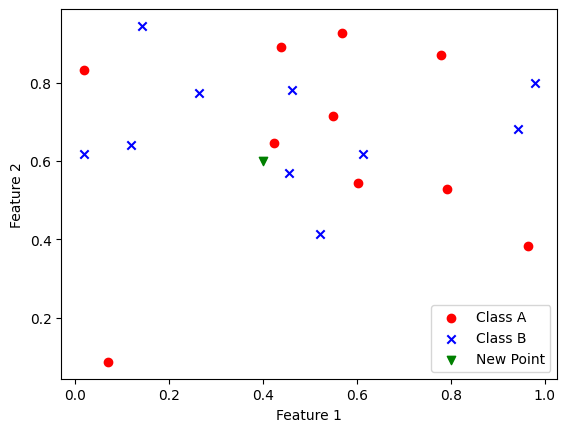

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some example data
np.random.seed(0)
data_points = np.random.rand(20, 2)  # 20 data points with 2 features
labels = np.array(['A'] * 10 + ['B'] * 10)  # 10 points of class A, 10 points of class B

# New data point for prediction
new_point = np.array([0.4, 0.6])

# Plot the data points
plt.scatter(data_points[labels == 'A'][:, 0], data_points[labels == 'A'][:, 1], c='red', marker='o', label='Class A')
plt.scatter(data_points[labels == 'B'][:, 0], data_points[labels == 'B'][:, 1], c='blue', marker='x', label='Class B')
plt.scatter(new_point[0], new_point[1], c='green', marker='v', label='New Point')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


The Euclidean distance between two data points X1 and X2 in a two-dimensional space is calculated as follows:

$D(X1,X2)= \sqrt{(x1_1-x2_1)²(x1_2-x2_2)²}$​

Here, $x1_1, x1_2$ and $x2_1, x2_2$ are the feature values of X1 and X2, respectively. In the case of the plane above, their x and y coordinates.

To make a prediction for a new data point, we follow these steps:

a. Calculate the Euclidean distance between the new point and all data points in the training set.

b. Select the K data points with the smallest distances.

c. Determine the majority class among these K data points and assign it as the predicted class for the new point.

In [5]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier with K=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(data_points, labels)

# Predict the class of the new point
predicted_class = knn.predict([new_point])

print("Predicted Class:", predicted_class[0])


Predicted Class: A


#### Decision trees

A decision tree is constructed of series of **branches with simple classifying tests**, such as "is the
value of feature 1 above or below 0.5?". Each option in a branch then leads to either a new
branch with another test, or a leaf which gives a final classification or score.

Several different
methods for training trees are used, but most common method is to create one branch at a time
out from the starting branch by making a test on only one feature which reduces the impurity
of the data the most, meaning **the test should create as much of a separation between classes as
possible**.

**Single trees are prone to overfitting** (have a tendency to fit the training data too closely, capturing noise and outliers) unless restricted in the maximum depth (how many branchings in a row there may be) (By restricting how deep the tree can go, you control its complexity, which can help reduce overfitting) or minimum number of training examples which are required to
keep creating branches (This ensures that branches are only created when there are enough data points to support them.), and often produce local minima. Thus, **decision trees are most often used as part of forests**, where there is slight variation in how the trees were trained to create an
ensemble of slightly different decision trees, which will reduce any overfitting greatly.

In a Random Forest, each tree is trained on a different subset of the data and a random subset of features. This introduces diversity among the trees. The slight variations in training data and features lead to slightly different decision trees.

By combining the predictions of multiple slightly different decision trees in a Random Forest, you effectively reduce the risk of overfitting. The ensemble nature of Random Forests helps to capture the underlying patterns in the data while smoothing out the noise and idiosyncrasies present in any individual decision tree.

#### **Random forest (1995/2006)**

One of the most commonly used forest machine learning algorithms is the Random Forest, which
is an easy to use and powerful method especially when the **input features are many** and **not normalized to the same scale** or distribution. When training a Random Forest classifier or regressor,
the random aspect is introduced at two levels:

**Training Set Bagging**: The individual decision trees for the forest are trained separately,
and rather than using the same training set for each tree, a **unique training set is con-
structed for each tree’s training**. This is done by randomly picking as many samples
from the original training set as it contains but **allowing for the same sample to be picked
several times**. The resulting set can thus contain multiples of the same sample and might
lack others completely.

**Branching Feature Selection**: Whenever a branch should be constructed for a tree, a
**random subset of all features are taken into consideration** (most often the square root of
the number of available features). For each feature, each number that produces a unique
split of samples is considered, and the feature and split which will produce the best
reduction in Gini Impurity is selected for the branching. For a regression problem, mean
squared error is sometimes used instead.

The **Gini Impurity** is calculated in the following manner: for each class label, multiply the
probability of randomly choosing a sample with that label by the probability of mis-labeling
that sample if a random label is assigned to it according to the distribution of labels in the set,
and then sum over all labels.

This way of training a random forest results in a predictor **capable of non-linear predictions**
which is **extremely robust against overfitting** if the number of trees in the forest is large enough. In fact, the theory that **an average between several different, independent learners either trained on slightly different data, with slightly different hyper-parameters, or initialized to
slightly different random states before learning will improve generalizability extends to other
machine learning algorithms beyond forests**. Additionally, the learned forest is easily inter-
preted in the form of its individual decision trees, and the **importance of individual features** to
the forest’s final predictions can be measured naively by calculating the direct reduction in Gini
impurity at branches splitting on those features. While this type of analysis can miss secondary
effects such as the splitting of one feature enabling better splits on another, it can give infor-
mation regarding features which contributes less to the predictive power, which can be used to
guide a feature selection process for reducing the number of input features as in.

A Random Forest is an ensemble learning method used for both classification and regression tasks. It combines multiple decision trees to create a more robust and accurate model.

Random Forest consists of multiple decision trees, where each tree is constructed using a different subset of the data and a random subset of features. The predictions from each tree are then aggregated to make a final prediction.

For **classification**, the Random Forest combines the results of individual trees to make a final prediction using a majority vote.

For **regression**, the Random Forest combines the results of individual trees to make a final prediction using the mean of the tree predictions.



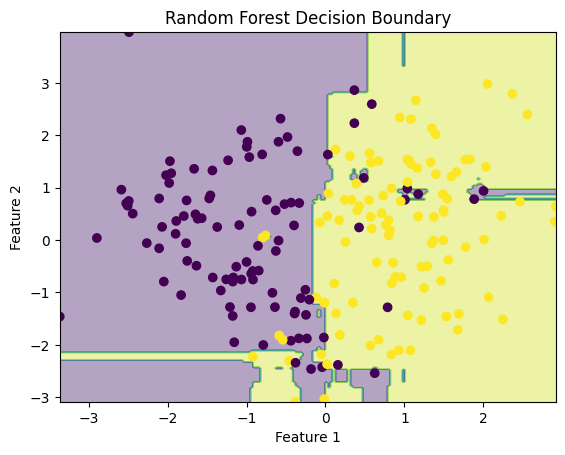

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Generate synthetic data
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier with 100 trees
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Visualize the decision boundary
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 200), 
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 200))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Random Forest Decision Boundary')
plt.show()


Random Forest starts by creating **multiple subsets** of the original training data through a process called **bootstrapping**. Each subset is obtained by randomly sampling the training data **with replacement**. This means that some data points may be included multiple times, while others may not be included at all in a given subset.

For each subset of the data, a decision tree is grown independently. These decision trees are often referred to as "base learners" or "weak learners."

At each node of the decision tree, a random subset of features is considered for splitting. This randomness helps to introduce diversity among the trees.

In a general sense, you can think of these features as characteristics or dimensions of each data point. For instance, you could consider these features to be:
- Feature 1: A characteristic of the data point, which could correspond to an "x" coordinate in a 2D space.
- Feature 2: Another characteristic of the data point, which could correspond to a "y" coordinate in a 2D space.

**From IBM: https://www.ibm.com/topics/random-forest**

Radnom forest combines the output of multiple decision trees to reach a single result. 

Decision trees seek to find the best split to subset the data, and they are typically trained through the Classification and Regression Tree (CART) algorithm. Metrics, such as Gini impurity, information gain, or mean square error (MSE), can be used to evaluate the quality of the split. 

While decision trees are common supervised learning algorithms, they can be prone to problems, such as bias and overfitting. However, when multiple decision trees form an ensemble in the random forest algorithm, they predict more accurate results, particularly when the individual trees are uncorrelated with each other.

Ensemble learning methods are made up of a set of classifiers—e.g. decision trees—and their predictions are aggregated to identify the most popular result. The most well-known ensemble methods are bagging, also known as bootstrap aggregation, and boosting.

Bagging method; in this method, a random sample of data in a training set is selected with replacement—meaning that the individual data points can be chosen more than once. After several data samples are generated, these models are then trained independently, and depending on the type of task—i.e. regression or classification—the average or majority of those predictions yield a more accurate estimate. This approach is commonly used to reduce variance within a noisy dataset.

The random forest algorithm is an extension of the bagging method as it utilizes both bagging and feature randomness to create an uncorrelated forest of decision trees. Feature randomness, also known as feature bagging or “the random subspace method”, generates a random subset of features, which ensures low correlation among decision trees. This is a key difference between decision trees and random forests. While decision trees consider all the possible feature splits, random forests only select a subset of those features.

Random forest algorithms have three main hyperparameters, which need to be set before training. These include node size, the number of trees, and the number of features sampled. From there, the random forest classifier can be used to solve for regression or classification problems.

The random forest algorithm is made up of a collection of decision trees, and each tree in the ensemble is comprised of a data sample drawn from a training set with replacement, called the bootstrap sample. Of that training sample, one-third of it is set aside as test data, known as the out-of-bag (oob) sample, which we’ll come back to later. Another instance of randomness is then injected through feature bagging, adding more diversity to the dataset and reducing the correlation among decision trees. Depending on the type of problem, the determination of the prediction will vary. For a regression task, the individual decision trees will be averaged, and for a classification task, a majority vote—i.e. the most frequent categorical variable—will yield the predicted class. Finally, the oob sample is then used for cross-validation, finalizing that prediction.

**Benefits**

- Reduced risk of overfitting: Decision trees run the risk of overfitting as they tend to tightly fit all the samples within training data. However, when there’s a robust number of decision trees in a random forest, the classifier won’t overfit the model since the averaging of uncorrelated trees lowers the overall variance and prediction error.
- Provides flexibility: Since random forest can handle both regression and classification tasks with a high degree of accuracy, it is a popular method among data scientists. Feature bagging also makes the random forest classifier an effective tool for estimating missing values as it maintains accuracy when a portion of the data is missing.
- Easy to determine feature importance: Random forest makes it easy to evaluate variable importance, or contribution, to the model. There are a few ways to evaluate feature importance. Gini importance and mean decrease in impurity (MDI) are usually used to measure how much the model’s accuracy decreases when a given variable is excluded. However, permutation importance, also known as mean decrease accuracy (MDA), is another importance measure. MDA identifies the average decrease in accuracy by randomly permutating the feature values in oob samples.

**Drawbacks**

- Time-consuming process: Since random forest algorithms can handle large data sets, they can be provide more accurate predictions, but can be slow to process data as they are computing data for each individual decision tree.
- Requires more resources: Since random forests process larger data sets, they’ll require more resources to store that data.
- More complex: The prediction of a single decision tree is easier to interpret when compared to a forest of them.

#### Neural networks

The term neural networks refers to a collection of machine learning algorithms based on compo-
nents inspired by biological neurons. The basis of most neural networks is the **perceptron**. Briefly,
a single perceptron will apply linear combinations of all input features with individual weights
before summing them and applying a function to the sum, called an **activation function**, returning
the modified sum as output. Most perceptrons also include a **bias term** which is an additional in-
put of 1 enabling it to create a **model not intersecting origin**. A basic perceptron classifier might
consist of several parallel perceptrons each tasked with predicting the probability of the input
representing a certain class label, and this is indeed how the end of most advanced classifier
neural networks look today. Note that **a perceptron is extremely similar to linear regression**, but
**with an activation function**, and the same regularizations applicable to linear regression can be
applied to perceptrons.

A perceptron is trained by assigning random values to its weights, passing training data through
it in a **forward pass**, calculating the loss on its output, and updating the weights through gradient
descent on them with relation to the loss. This process is typically repeated several times but
keeping the weights from the last iteration rather than randomizing new ones. This means that
the **activation function and loss function need to be differentiable**.

Common activation functions: sigmoid, tanh, ELU, ReLU

**Activation Function**: The activation function must be differentiable so that the derivative of the loss with respect to the activations can be calculated. This derivative is used in the chain rule to compute gradients and update the weights through **backpropagation**.

**Loss Function**: The loss function must also be differentiable because it's used to compute the difference between the predicted and actual outputs. The derivative of the loss with respect to the model's output is essential for gradient descent to determine how to adjust the model's parameters to **minimize the loss**.

#### **Multilayer perceptrons**

Since perceptrons are differentiable, the output of several perceptrons can be fed as input to
another, and the gradient could still be calculated on all weights of all perceptrons through the
chain rule of differentiation. Since the activation functions of perceptrons can be non-linear,
even if the non-linearity is simple, the output from multiple connected layers of perceptrons can
quickly describe complex non-linear relationships.

Multi-layer perceptrons have historically been difficult and inefficient to work with, resulting
in them seeing little use even though the theory behind them has existed longer than that of
random forests.

This is because of the many calculations which needs to be performed
for every weight to apply gradient descent methods to a larger network of perceptrons. This
has since been alleviated by better applications of the chain rule of differentiation for updat-
ing weights without performing redundant calculations, called backpropagation algorithms, but
mostly by the rise of increased computational power in the form of improved graphical process-
ing units (GPU) capable of performing vast amounts of simple calculations in parallel.



#### **Stochastic gradient descent and batch learning**

Stochastic = well described by a random probability distribution

Machine learning algorithms require large amounts of data. If a gradient is calculated with
regards to all data in a training set, it will not only probably require large amounts of memory
and computational time, but also risks a local optimum capturing the model. **Stochastic gradient
descent** in its pure form involves calculating only the gradient for a **single sample at a time** to
combat these weaknesses, but this descent will be exceedingly noisy (and thus slow to converge
on an optima) and will not make proper use of parallel computing capabilities of GPUs. Thus,
most often the gradient is calculated on **mini-batches** (sometimes just denoted batches) of 8-64
samples at a time. When all datapoints in the training set have been sampled in a mini-batch,
that is referred to as an **epoch**.

#### Optimizers

Gradient descent as an optimization method for weights relies on the step-size taken. Too large
updates to weights will lead to overshooting or missing optima, while too small updates will
risk converging on small local optima. This step size is often referred to as **learning rate**, and
ideally it should be varied depending on the proximity to global optima. Different optimizers for
controlling the learning rate exists, and the most common as of writing is the **"adaptive moment
estimation"** or "ADAM" optimizer, which involves having a separate learning rate for each pa-
rameter and adapting these learning rates based on first and second moments (magnitudes of
mean and uncentered variance) of the gradients.

#### Layers

In a neural network, a layer is a **collection of perceptrons or other elements** sitting at the same
level of the network relative the inputs. In excess of the basic configuration of perceptrons using the outputs from a previous layer of perceptrons as input, many different variants of layers of a neural network have been developed
for specialized tasks. Some layers lack learnable parameters but might aid in the generalization
or convergence of the network. A selection of neural network layers relevant to the works in
this thesis are described below

**Dense**: The term dense or **fully connected** layer refers to a layer of perceptrons all taking
all outputs from the previous layer as inputs. 

**Softmax**: Technically an **activation function**, a softmax layer **normalizes the outputs** of
the previous layer by their exponentials to ensure they all sum up to 1. This is frequently
used at the end of a network tasked with classification, to give a probability for each class.

**Convolution**: A convolutional layer acts as a **filter** being passed over its input like a sliding
window akin to how a filter is applied to an image. Convolution layers
were developed for visual tasks where not only the information encoded in each input
is important but also their position relative to other nearby inputs. The output of a convolution layer is calculated per position. 

**Embedding**: Assuming an input of discrete integers, for instance numbers representing
different words or letters, an embedding layer outputs a floating point feature vector to
represent the input. Effectively, the input integer functions as an index to a table with
learned parameters. This has been useful in language processing to compress the space
of known words into small feature vectors rather than a huge set of discrete integers and
can be used to glean relationships between input classes from component analysis of the
learned vectors.

**Attention**: Attention layers were constructed for language processing, translation, and
recognition. The basic idea is that the layer takes a number of feature vectors (originally
representing a series of words) and compares their combined pattern with a number of
keys to output a value corresponding to the most fitting key. There are learned weights
associated with transforming the input values, the keys, and the output values all to fit
each other. Often, attention is used as self-attention, where the input is also used as
basis for the keys and values. In language processing, this is used to create more and
more complex relations between the preceding words.

**Bypass**: As networks became deeper and deeper, the problem of **vanishing gradient** put a
limit on the maximum realistic depth. In each chain rule step passed through, some of
the gradient is explained by some of the weights, and after enough steps there is little to
no relevant gradient left. To counteract this, one or more bypass layers are often found in
networks, which is simply a concatenation or addition of the output from a layer further
down the network with output from earlier layers, to allow the gradient to "bypass"
layers.

**Pooling**: These layers sum, average, or otherwise **down-sample the dimensionality** of
input data by combining spatially connected inputs. For example, reducing the size of
an image to 25% its original size by averaging squares of 4 pixels. This produces a form
of pseudo-invariance to translation in convolutional networks, at least on a smaller scale
of translation.

**Dropout**: This simply **sets a random selection of features to 0** before the next layer. By
applying dropout during training, the network is forced to create redundant solutions,
effectively **creating many slightly different networks** trained at the same time. This leads
to **reduced overfitting** in a similar manner to how a random forest achieves it by virtue
of multiple trees trained slightly differently to predict the same problem.

**Batch Normalization**: In a multi-layer network, the weights and outputs of later layers
depends on the output of previous ones. As such, when the network changes during
training, the later layers will constantly need to compensate for shifting means and devi-
ations of the incoming distribution, in excess of their own learning. Batch Normalization
**speeds up training significantly and avoids local minima**, and was originally suggested
as a way of mitigating the aforementioned problem by normalizing the mean and stan-
dard deviation of the data flowing between other layers. However, there are many
conflicting theories on why batch normalization actually works.

**Recurrent**: A recurrent network takes in **sequential information**, images over time in a
video for instance, and applies the same set of operations each time step to produce an
output. However, this is done in sequence order, and the recurrent module keeps in-
formation from previously observed states in the sequence, using both its actual input
and the previous sequence step state as inputs. Like how convolution is fitting for spa-
tially ordered data, recurrent layers are especially useful for temporally ordered data,
like images in a video. The LSTM (Long Short Term Memory) is a recurrent system with
measures to avoid vanishing gradients over the recursions.

**Graph Convolution**: Similar to convolution layers, a graph convolution is applied on ver-
tices over incident edges of a graph rather than spatial proximity of inputs on a grid.
Rather than separate weights for different relative positions in the local grid, it instead
has weights applying on the vertex input features dependent on the features of the edges
they are applied over. A basic graph convolution layer might instead convolve directly
between adjacent vertices without modification based on edge features.

**Graph Network**: A continuation on the graph convolution layers, a graph network layer is
actually three layers of graph convolution between different entities; edges, vertices, and
global features.



#### Architechture

The configuration of layers in a neural network is commonly referred to as its architecture, and
just like protein structures can have domains which act as independent units often conserved
across several proteins, some local architectures of neural networks have been popularized into
use in different networks, most often through developments in the image recognition field. An
example of a common local architecture is the **ResNet architecture**.

Another example of a general network architecture but for more specialized solutions is the Gen-
erative Adversarial Network (GAN). It is a way of training a network to **generate something**, new
faces for example, that are as realistic as possible, which works by constructing two networks
and training them in tandem. In the face generation example, one network is trained to classify
whether a face is real or not and another is trained to fool the first, with the loss function for it
being based in success rate.


## Heres a quick run through of xgboost from chatgpt

XGBoost (Extreme Gradient Boosting) is a popular machine learning algorithm known for its high performance and efficiency in solving regression and classification problems. It is a **gradient boosting algorithm** that builds an ensemble of decision trees to make predictions. XGBoost is widely used in machine learning competitions and real-world applications.

The core idea behind XGBoost is to iteratively build a collection of decision trees, with each tree attempting to correct the errors made by the previous ones. 

Theory:

**Objective Function**: XGBoost minimizes an objective function, which is a sum of a loss function and a regularization term. The loss function measures the error between the predicted values and the actual target values. The regularization term helps prevent overfitting by penalizing complex models.

**Gradient Boosting**: XGBoost uses gradient boosting to minimize the objective function. Gradient boosting works by iteratively adding decision trees to the model. Each tree is fitted to the negative gradient of the objective function, which helps reduce the errors made by the previous trees.

**Decision Trees**: XGBoost uses regression trees, and in the case of classification, it builds a set of regression trees where each leaf represents a class.

**Regularization**: XGBoost provides several regularization techniques such as L1 (Lasso) and L2 (Ridge) regularization to control the complexity of the model.



Accuracy: 0.96


/home/monkey/.local/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [14:01:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


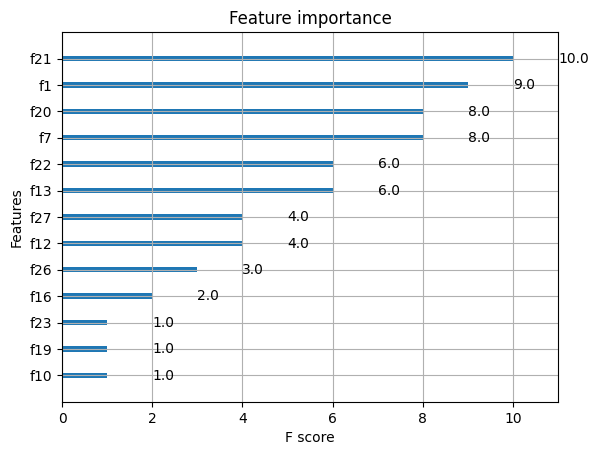

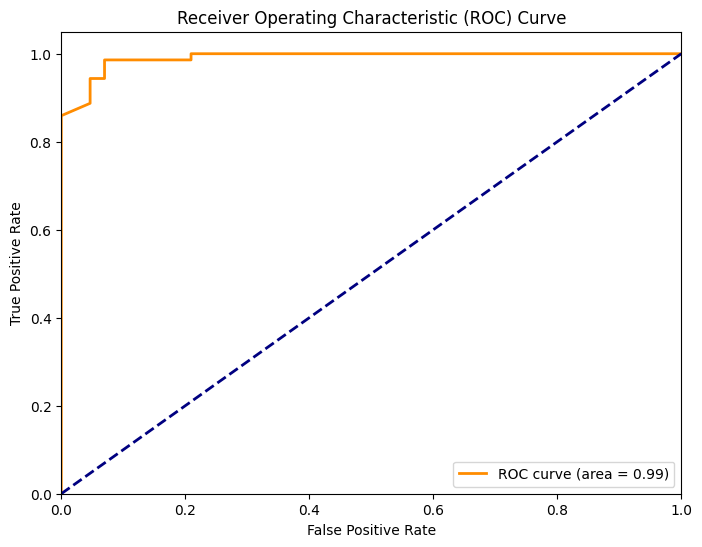

In [8]:
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize

# Load a sample dataset (breast cancer dataset)
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DMatrix for training and testing data
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define hyperparameters
params = {
    "objective": "binary:logistic",
    "max_depth": 3,
    "learning_rate": 0.1,
    "n_estimators": 100,
}

# Train the XGBoost model
model = xgb.train(params, dtrain)

# Make predictions on the test set
y_pred = model.predict(dtest)

# Convert probabilities to binary predictions
y_pred_binary = [1 if p > 0.5 else 0 for p in y_pred]

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy: {accuracy:.2f}")

# Plot feature importance
xgb.plot_importance(model)
plt.show()

# Visualize ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


## From: Deep Learning, Goodfellow

### Chapter 1 - introduction

Several artiﬁcial intelligence projects have sought to hard-code knowledge
about the world in formal languages. A computer can reason automatically about
statements in these formal languages using logical inference rules. This is known as
the **knowledge base**
approach to artiﬁcial intelligence. None of these projects has
led to a major success. 

AI systems need the ability to acquire their own knowledge, by extracting **patterns from raw data**. This capability is known as
machine learning
.

A simple
machine learning algorithm called
**logistic regression**
can determine whether to
recommend cesarean delivery.

A simple machine learning
algorithm called **naive Bayes** can separate legitimate e-mail from spam e-mail.

The performance of these simple machine learning algorithms depends heavily
on the
**representation
of the data** they are given. For example, when logistic
regression is used to recommend cesarean delivery, the AI system does not examine
the patient directly. Instead, the doctor tells the system several pieces of relevant
information, such as the presence or absence of a uterine scar. Each piece of
information included in the representation of the patient is known as a
**feature**
.

Logistic regression learns how each of these features of the patient correlates with
various outcomes.

In computer science, operations
such as searching a collection of data can proceed exponentially faster if the collec-
tion is structured and indexed intelligently. 

**Example**: cartesian coordinates vs polar coordinates

<img src="cartesian_polar.png" alt="pic failed" width="700" height="300">

The cartesian coordinates cant be easily separated, at least not linearly.

Polar coordinates are a system of representing points or positions in a two-dimensional space using two parameters: distance (radius) and angle. 

**Radius (r)**: The radial distance from the origin (the center) to the point of interest. It is always a non-negative value.

**Angle (θ)**: The angle measured in radians from a reference direction, typically the positive x-axis (0 radians), counterclockwise to the line connecting the origin to the point.

To convert from polar coordinates (r, θ) to Cartesian coordinates (x, y), you can use the following equations:

$x=r⋅cos⁡(θ)$

$y=r⋅sin⁡(θ)$

To convert from Cartesian coordinates (x, y) to polar coordinates (r, θ), you can use the following equations:

$r=\sqrt{x^2+y^2}$

​$\theta = \arctan\left(\frac{y}{x}\right)$

Polar coordinates are commonly used in various fields, including physics, engineering, and mathematics, when dealing with problems involving rotation, symmetry, or circular patterns. They offer a more intuitive way to describe and analyze such situations.

Many artiﬁcial intelligence tasks can be solved by **designing the right set of
features** to extract for that task, then providing these features to a simple machine
learning algorithm.

For many tasks, however, it is diﬃcult to know what features should be
extracted. One solution to this problem is to use machine learning to discover not only
the mapping from representation to output but also the representation itself.
This approach is known as
**representation learning**
. Learned representations
often result in much better performance than can be obtained with hand-designed
representations.

They also enable AI systems to rapidly adapt to new tasks, with
minimal human intervention.

The quintessential example of a representation learning algorithm is the
**autoencoder**
. An autoencoder is the combination of an
encoder
function, which
converts the input data into a diﬀerent representation, and a
decoder
function,
which converts the new representation back into the original format. Autoencoders
are trained to preserve as much information as possible when an input is run
through the encoder and then the decoder, but they are also trained to make the
new representation have various nice properties. Diﬀerent kinds of autoencoders
aim to achieve diﬀerent kinds of properties.

When designing features or algorithms for learning features, our goal is usually
to separate the
**factors of variation**
that explain the observed data.

They can be thought of as
concepts or abstractions that help us make sense of the rich variability in the data.

Most applications require us to **disentangle** the factors of variation and discard the
ones that we do not care about.

Of course, it can be very diﬃcult to extract such high-level, abstract features
from raw data. 

**Deep learning**
solves this central problem in representation learning by intro-
ducing representations that are expressed in terms of other, simpler representations.
Deep learning enables the computer to build complex concepts out of simpler con-
cepts.

deep learning can be regarded as the
study of models that involve a greater amount of composition of either learned
functions or learned concepts than traditional machine learning does.

<img src="ml_overview.png" alt="pic failed" width="700" height="800">

Shaded boxes: what the ML can do without human help?

Linear models have many limitations. Most famously, they cannot learn the
XOR function, where f([0,1], w) = 1 and f([1,0], w) = 1 but f([1,1], w) = 0 and f([0,0], w) = 0.

A crowning achievement of deep learning is its extension to the domain of
**reinforcement learning**
. In the context of reinforcement learning, an autonomous
agent must learn to perform a task by trial and error, without any guidance from
the human operator.

### Chapter 5 - ML basics

We begin with a deﬁnition of what a **learning algorithm** is and present an example: the *linear regression* algorithm. 

We then proceed to describe how the challenge of **ﬁtting the training data** diﬀers from the challenge of **ﬁnding patterns
that generalize to new data**. 

Most machine learning algorithms have settings
called **hyperparameters**, which must be determined outside the learning algorithm
itself; we discuss how to set these using additional data. 

Machine learning is
essentially a form of **applied statistics** with increased emphasis on the use of
computers to statistically estimate complicated functions and a decreased emphasis
on proving conﬁdence intervals around these functions; we therefore present the
two central approaches to statistics: **frequentist estimators** and **Bayesian inference**.

Most machine learning algorithms can be divided into the categories of **supervised
learning** and **unsupervised learning**; we describe these categories and give some
examples of simple learning algorithms from each category. 

Most deep learning
algorithms are based on an optimization algorithm called **stochastic gradient descent**. We describe how to combine various algorithm components, such as
an **optimization algorithm**, a **cost function**, a **model**, and a **dataset**, to build a
machine learning algorithm.

### Learning algorithms

A machine learning algorithm is an algorithm that is able to learn from data.

“A computer program is said to learn from experience
**E**
with respect to some
class of tasks
**T**
and performance measure
**P**
, if its performance at tasks in
**T**
, as
measured by
**P**
, improves with experience
**E**
.”

##### THE TASK, T

Machine learning enables us to tackle tasks that are too diﬃcult to solve with
ﬁxed programs written and designed by human beings.

Learning is our means of attaining the ability to perform a
task.

Machine learning tasks are usually described in terms of how the machine
learning system should process an
**example**
.

An example is a collection of
**features**
that have been quantitatively measured from some object or event that we want
the machine learning system to process.



We typically represent an **example** as a
vector $\vec{x} \in \mathbb{R}^n$ (vector that belongs to the set of real numbers)
where each entry
$x_i$
of the vector is another feature.

For example,
the features of an image are usually the values of the pixels in the image.



Some of the most
common **machine learning tasks** include the following:


**Classiﬁcation**: In this type of task, the computer program is asked to specify
which of
$k$
categories some input belongs to. To solve this task, the learning
algorithm is usually asked to produce a function

$f: \mathbb{R}^n \rightarrow \{1,...,k\}$ 

(function that maps input vectors from the n-dimensional real numbers to the set of integers from 1 to $k$. The input to the function is an n-dimensional real-valued vector. For example, if $n = 2$, the input is a 2D vector.)

When $y=f(\vec{x})$, the model assigns an input described by vector
$\vec{x}$ 
to a category
identiﬁed by numeric code
$y$
. 

There are other variants of the classiﬁcation
task, for example, where
$f$
outputs a probability distribution over classes.
An example of a classiﬁcation task is object recognition, where the input
is an image (usually described as a set of pixel brightness values), and the
output is a numeric code identifying the object in the image. 

**Classiﬁcation with missing inputs**
: Classiﬁcation becomes more challenging if the computer program is not guaranteed that every measurement in
its input vector will always be provided. To solve the regular classiﬁcation task, the
learning algorithm only has to deﬁne a single function mapping from a vector
input to a categorical output. When some of the inputs may be missing,
rather than providing a single classiﬁcation function, the learning algorithm
must learn a **set of functions**. 

Each function corresponds to classifying
$\vec{x}$
with
a diﬀerent subset of its inputs missing. This kind of situation arises frequently
in medical diagnosis, because many kinds of medical tests are expensive or
invasive. 

One way to eﬃciently deﬁne such a large set of functions is to
learn a probability distribution over all the relevant variables (This probability distribution represents the likelihood of observing different values for these variables), then solve the
classiﬁcation task by marginalizing out the missing variables (integrating or summing over all possible values for these variables). With
$n$
input
variables, we can now obtain all $2^n$ 
diﬀerent classiﬁcation functions needed
for each possible set of missing inputs (the traditional approach would require defining $2^n$ different classification functions, each corresponding to a unique combination of inputs), but the computer program needs
to learn only a single function describing the joint probability distribution.


**Regression**
: In this type of task, the computer program is asked to predict a
numerical value given some input. To solve this task, the learning algorithm
is asked to output a function

$f:\mathbb{R}^n → \mathbb{R}$ 

This type of task is similar to
classiﬁcation, except that the format of output is diﬀerent. An example of
a regression task is the prediction of the expected claim amount that an
insured person will make (used to set insurance premiums), or the prediction
of future prices of securities. These kinds of predictions are also used for
algorithmic trading.

**Transcription**
: In this type of task, the machine learning system is asked
to observe a **relatively unstructured** representation of some kind of data
and transcribe the information into discrete textual form. For example, in
optical character recognition, the computer program is shown a photograph
containing an image of text and is asked to return this text in the form of
a sequence of characters (e.g., in ASCII or Unicode format). Google Street
View uses deep learning to process address numbers in this way. Another example is speech recognition, where the computer
program is provided an audio waveform and emits a sequence of characters or
word ID codes describing the words that were spoken in the audio recording.


**Machine translation**
: In a machine translation task, the input already
consists of a sequence of symbols in some language, and the computer program
must convert this into a sequence of symbols in another language. This is
commonly applied to natural languages, such as translating from English to
French. 

**Structured output**
: Structured output tasks involve any task where the
output is a vector (or other data structure containing multiple values) with
important relationships between the diﬀerent elements. This is a broad
category and subsumes the transcription and translation tasks described
above, as well as many other tasks. One example is parsing—mapping a
natural language sentence into a tree that describes its grammatical structure
by tagging nodes of the trees as being verbs, nouns, adverbs, and so on.
These tasks
are called structured output tasks because the program must output several
values that are all tightly interrelated. For example, the words produced by
an image captioning program must form a valid sentence.

**Anomaly detection**
: In this type of task, the computer program sifts
through a set of events or objects and ﬂags some of them as being unusual
or atypical. An example of an anomaly detection task is credit card fraud
detection. By modeling your purchasing habits, a credit card company can
detect misuse of your cards. If a thief steals your credit card or credit card
information, the thief’s purchases will often come from a diﬀerent probability
distribution over purchase types than your own. The credit card company
can prevent fraud by placing a hold on an account as soon as that card has
been used for an uncharacteristic purchase. 

**Synthesis and sampling**
: In this type of task, the machine learning algorithm is asked to generate new examples that are similar to those in the
training data. Synthesis and sampling via machine learning can be useful
for media applications when generating large volumes of content by hand
would be expensive, boring, or require too much time. For example, video
games can automatically generate textures for large objects or landscapes,
rather than requiring an artist to manually label each pixel.
In some cases, we want the sampling or synthesis procedure to generate a
speciﬁc kind of output given the input. For example, in a speech synthesis
task, we provide a written sentence and ask the program to emit an audio
waveform containing a spoken version of that sentence. This is a kind of
structured output task, but with the added qualiﬁcation that there is no
single correct output for each input, and we explicitly desire a large amount
of variation in the output, in order for the output to seem more natural and
realistic.

**Imputation of missing values**
: In this type of task, the machine learning
algorithm is given a new example $\vec{x} \in \mathbb{R}^n$
, but with some entries
$x_i$ 
of
$\vec{x}$ missing. The algorithm must provide a prediction of the values of the missing
entries.

**Denoising**
: In this type of task, the machine learning algorithm is given as
input a *corrupted example*
$\tilde{x} \in \mathbb{R}^n$
obtained by an unknown corruption process
from a *clean example*
$\vec{x} \in \mathbb{R}^n$
. The learner must predict the clean example
$\vec{x}$
from its corrupted version
$\tilde{x}$, or more generally predict the conditional
probability distribution $P(\vec{x}|\tilde{x})$. It answers the question, "What is the likelihood of the clean data being $\vec{x}$ when the observed data is $\tilde{x}$?" This conditional distribution encapsulates the relationship between the corrupted and clean data.

**Density estimation**
or
**probability mass function estimation**
: In the
density estimation problem, the machine learning algorithm is asked to learn a
function

$p_\text{model}: \mathbb{R}^n → \mathbb{R}$

where $p_\text{model} (\vec{x})$ can be interpreted as a probability
density function (if
$\vec{x}$
is continuous) or a probability mass function (if
$\vec{x}$
is
discrete) on the space that the examples were drawn from. 

To do such a task
well (we will specify exactly what that means when we discuss performance
measures P), the algorithm needs to learn the structure of the data it has seen.
It must know where examples cluster tightly and where they are unlikely to
occur. Most of the tasks described above require the learning algorithm to at
least implicitly capture the structure of the probability distribution. Density
estimation enables us to explicitly capture that distribution. 

In principle,
we can then perform computations on that distribution to solve the other
tasks as well. For example, if we have performed density estimation to obtain
a probability distribution $p(\vec{x})$ , we can use that distribution to solve the
missing value imputation task. If a value
$x_i$
is missing, and all the other
values, denoted
$\vec{x}_{-i}$, are given, then we know the distribution over it is given
by
$p(x_i| \vec{x}_{−i})$. 

In practice, density estimation does not always enable us to
solve all these related tasks, because in many cases the required operations
on $p(x)$ are computationally intractable.

#### The performance measure, P

To evaluate the abilities of a machine learning algorithm, we must design a
quantitative measure of its performance. Usually this performance measure
P
is
speciﬁc to the task T being carried out by the system.

For tasks such as classiﬁcation, classiﬁcation with missing inputs, and tran-
scription, we often measure the
**accuracy**
of the model.

Accuracy = proportion of examples for which the model produces the correct output.

We can
also obtain equivalent information by measuring the
**error rate**
, the proportion
of examples for which the model produces an incorrect output. 

We often refer to
the error rate as the expected 0-1 loss. The 0-1 loss on a particular example is 0
if it is correctly classiﬁed and 1 if it is not.

We evaluate these performance measures using
a
**test set**
of data that is separate from the data used for training the machine
learning system.

The choice of performance measure may seem straightforward and objective,
but it is often diﬃcult to choose a performance measure that corresponds well to
the desired behavior of the system.

When performing a regression task, should we penalize the
system more if it frequently makes medium-sized mistakes or if it rarely makes
very large mistakes? These kinds of design choices depend on the application.



#### The Experience, E

Machine learning algorithms can be broadly categorized as
**unsupervised**
or
**supervised**
by what kind of experience they are allowed to have during the
learning process.

Most of the learning algorithms in this book can be understood as being allowed to experience an entire
**dataset** of many examples. Sometimes we call examples **data points**.



**Unsupervised learning algorithms**
experience a dataset containing many
features, then learn useful properties of the structure of this dataset. In the context
of deep learning, we usually want to learn the entire probability distribution that
generated a dataset, whether explicitly, as in density estimation, or implicitly, for
tasks like synthesis or denoising. Some other unsupervised learning algorithms
perform other roles, like clustering, which consists of dividing the dataset into
clusters of similar examples.

**Supervised learning algorithms**
experience a dataset containing features,
but each example is also associated with a
**label**
or
**target**
. For example, the Iris
dataset is annotated with the species of each iris plant. A supervised learning
algorithm can study the Iris dataset and learn to classify iris plants into three
diﬀerent species based on their measurements.

Roughly speaking, unsupervised learning involves observing several examples
of a random vector $\vec{x}$ and attempting to implicitly or explicitly learn the probability distribution
$p(\vec{x})$, or some interesting properties of that distribution; while
supervised learning involves observing several examples of a random vector
$\vec{x}$
and
an associated value or vector
$y$
, then learning to predict
$y$
from
$\vec{x}$
, usually by
estimating
$p(y | \vec{x})$.

The lines between unsupervised and supervised are often blurred. Kind of like Robin Thicke.

Traditionally, people refer to regression, classiﬁcation
and structured output problems as supervised learning. Density estimation in
support of other tasks is usually considered unsupervised learning.

In **semi-
supervised** learning, some examples include a supervision target but others do
not. In **multi-instance** learning, an entire collection of examples is labeled as
containing or not containing an example of a class, but the individual members
of the collection are not labeled.

Some machine learning algorithms do not just experience a ﬁxed dataset. For
example,
reinforcement learning
algorithms interact with an environment, so
there is a feedback loop between the learning system and its experiences.

Most machine learning algorithms simply experience a dataset. A dataset can
be described in many ways. In all cases, a dataset is a collection of examples,
which are in turn collections of features.

One common way of describing a dataset is with a **design matrix**. A design
matrix is a matrix containing a diﬀerent example in each row. Each column of the
matrix corresponds to a diﬀerent feature. For instance, the Iris dataset contains
150 examples with four features for each example. This means we can represent
the dataset with a design matrix

$X ∈ \mathbb{R}^{150x4}$

where
$X_i,1$ is the sepal length of
plant
i
,
$X_i,2$
is the sepal width of plant
i
, etc. We describe most of the learning
algorithms in this book in terms of how they operate on design matrix datasets.

Of course, to describe a dataset as a design matrix, it must be possible to
describe each example as a vector, and each of these vectors must be the same size.
This is not always possible.

In cases like these, rather than describing the
dataset as a matrix with $m$ rows, we describe it as a set containing
$m$
elements:

$\{\vec{x}^{(1)}, \vec{x}^{(2)}, . . . , \vec{x}^{(m)}\}$

The vectors need not have the same size.

In the case of supervised learning, the example contains a label or target as
well as a collection of features. For example, if we want to use a learning algorithm
to perform object recognition from photographs, we need to specify which object
appears in each of the photos.

We might do this with a numeric code, with 0
signifying a person, 1 signifying a car, 2 signifying a cat, and so forth. Often when
working with a dataset containing a design matrix of feature observations
$X$
, we
also provide a vector of labels $\vec{y}$, with $y_i$
providing the label for example i.

#### Example: linear regression

The goal is to build a system that can take a vector
$\vec{x} ∈ \mathbb{R}^n$
as input and
predict the value of a scalar
$y ∈ \mathbb{R}$
as its output. 

The output of linear regression is
a linear function of the input. 

Let $\hat{y}$
be the value that our model predicts
$y$
should
take on. 

We deﬁne the output to be $\hat{y} = \vec{w}^{\intercal} \vec{x}$

where $\vec{w} ∈ \mathbb{R}^n$
is a vector of parameters.

(The transpose of the parameter vector $\vec{w}$, is used to match the dimensions of $\vec{w}$ and $\vec{x}$ in the dot product.)

Parameters are values that control the behavior of the system. In this case,
$w_i$
is
the coeﬃcient that we multiply by feature
$x_i$
before summing up the contributions
from all the features. We can think of
$\vec{w}$
as a set of
weights that determine how each feature aﬀects the prediction.

If a feature receives a positive weight then increasing the value of that feature increases the value of our prediction.
If a feature receives a negative weight, then increasing the value of that feature
decreases the value of our prediction.

If a feature’s weight is large in magnitude,
then it has a large eﬀect on the prediction. If a feature’s weight is zero, it has no
eﬀect on the prediction.

We thus have a deﬁnition of our task
T
: to predict
$y$
from
$\vec{x}$
by outputting
$\hat{y} = \vec{w}^{\intercal} \vec{x}$. 

Next we need a deﬁnition of our performance measure, P. 

Suppose that we have a design matrix of
$m$
example inputs that we will not
use for training, only for evaluating how well the model performs. 

We also have
a vector of regression targets providing the correct value of
$y$
for each of these
examples.

Because this dataset will only be used for evaluation, we call it the test
set.

We refer to the design matrix of inputs as
 $X^{(test)}$ 
and the vector of regression
targets as $y^{(test)}$ .

One way of measuring the performance of the model is to compute the
**mean
squared error MSE**
of the model on the test set.

If $\hat{y}^{(test)}$
gives the predictions of the
model on the test set, then the mean squared error is given by:

$\mathrm{MSE}_{\text {test }}=\frac{1}{m} \sum_{i=1}^m\left(\hat{\boldsymbol{y}}^{(\text {test})}-\boldsymbol{y}^{(\text {test})}\right)_i^2$

Intuitively, one can see that this error measure decreases to 0 when $\hat{\boldsymbol{y}}^{(\text {test})}=\boldsymbol{y}^{(\text {test})}$.

We can also see that

$\mathrm{MSE}_{\text {test }}=\frac{1}{m}\left\|\hat{\boldsymbol{y}}^{(\text {test })}-\boldsymbol{y}^{(\text {test })}\right\|_2^2$

so the error increases whenever the Euclidean distance between the predictions
and the targets increases.

The Euclidean L2 norm:

The L2 norm of a vector $\|\vec{y}\|_2$
is calculated as the square root of the sum of the squared elements in the vector. 

Squaring it again $\|\vec{y}\|_2²$ is done to obtain the squared Euclidean distance, which is more convenient for optimization and is equivalent to the MSE.

The L2 norm (Euclidean norm) of the difference between two vectors $\|\vec{y}-\vec{x}\|_2$ is the same as the L2 norm of the vector obtained by subtracting one vector from the other $\vec{y}-\vec{x}=\vec{z}$,  $\|\vec{y}-\vec{x}\|_2 = \|\vec{z}\|_2$

To make a machine learning algorithm, we need to design an algorithm that
will improve the weights $w$ in a way that reduces MSE(test) when the algorithm
is allowed to gain experience by observing a training set $(X^{(train)}, y^{(train)})$.

One
intuitive way of doing this is just to
minimize the mean squared error on the training set, MSE(train).

To minimize MSE(train)
, we can simply solve for where its gradient is 0.

$\nabla_w \text { MSE }_{\text {train }}=0$

No were in gradient descent again. We'll skip this for later.

It is worth noting that the term
linear regression
is often used to refer to
a slightly more sophisticated model with one additional parameter — an intercept
term b. In this model:

$\hat{y} = \vec{w}^{\intercal} \vec{x}+b$ 

The mapping from parameters to predictions is still a linear function but the
mapping from features to predictions is now an aﬃne function.

An affine function, also known as an affine transformation or affine map, is a type of mathematical function that describes a linear transformation followed by a translation. The translation part (b) allows for a shift in the vector space. It moves all points by the same amount.

This means that the plot of the model’s predictions still looks like a
line, but it need not pass through the origin.

Instead of adding the bias parameter
b
, one can continue to use the model with only weights but augment
x
with an
extra entry that is always set to 1. 

The weight corresponding to the extra 1 entry
plays the role of the bias parameter.

The intercept term
b
is often called the
bias
parameter of the aﬃne transformation. This terminology derives from the point of view that the output of the
transformation is biased toward being
b
in the absence of any input.

#### Capacity, overfitting, underfitting

hepp hepp